# **Análise de Dados**: Estante de Livros

[LinkedIn](https://www.linkedin.com/in/malu-analise-de-dados/)<br>
[GitHub](https://github.com/malucor)

---

## 1\. Contexto

Foram analisados dados extraídos de uma planilha Excel com informações relacionadas aos livros presentes em uma estante.



---



## 2\. Pacotes e bibliotecas

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook



---



## 3\. Exploração de dados

### 3\.1 Coleta de Dados

In [2]:
planilhas = load_workbook(filename='meus_livros.xlsx')

In [3]:
serie = []
ordem = []
titulo = []
autor = []
paginas = []
situacao = []

In [4]:
planilha = planilhas.active
cabecalho = next(planilha.values)

In [5]:
indice_serie = cabecalho.index('SÉRIE')
serie = [linha[indice_serie] for linha in planilha.values]

indice_ordem = cabecalho.index('ORDEM')
ordem = [linha[indice_ordem] for linha in planilha.values]

indice_titulo = cabecalho.index('TÍTULO')
titulo = [linha[indice_titulo] for linha in planilha.values]

indice_autor = cabecalho.index('AUTOR')
autor = [linha[indice_autor] for linha in planilha.values]

indice_paginas = cabecalho.index('PÁGINAS')
paginas = [linha[indice_paginas] for linha in planilha.values]

indice_situacao = cabecalho.index('SITUAÇÃO')
situacao = [linha[indice_situacao] for linha in planilha.values]

In [6]:
with open(file='./meus_livros.csv', mode='w', encoding='utf8') as arquivo:
    escritor_csv = csv.writer(arquivo, delimiter=',')
    for valores in zip(serie, ordem, titulo, autor, paginas, situacao):
        escritor_csv.writerow(valores)

### 3\.2 Wrangling da Estrutura

In [7]:
livros_df = pd.read_csv('meus_livros.csv')
livros_df.head()

,SÉRIE,ORDEM,TÍTULO,AUTOR,PÁGINAS,SITUAÇÃO
0,Mo Dao Zu Shi: O Fundador da Cultivação Demoníaca,1,Volume 1,Mo Xiang Tong Xiu,472,lido
1,Mo Dao Zu Shi: O Fundador da Cultivação Demoníaca,2,Volume 2,Mo Xiang Tong Xiu,456,lendo
2,Wotakoi: O Amor é Difícil para Otakus,1,Volume 1,Fujita,128,lido
3,Horimiya,1,Volume 1,HERO,176,lido
4,"Kagua-sama, Love is War",1,Volume 1,Aka Akasaka,212,lido


### 3\.3 Explorção do Schema

In [8]:
livros_df.dtypes

SÉRIE       object
ORDEM       object
TÍTULO      object
AUTOR       object
PÁGINAS     object
SITUAÇÃO    object
dtype: object

### 3\.4 Dados Faltantes

In [9]:
livros_df.isna().any()

SÉRIE        True
ORDEM        True
TÍTULO      False
AUTOR       False
PÁGINAS     False
SITUAÇÃO    False
dtype: bool



---



## 4\. Manipulação

### 4\.1 Enriquecimento

In [10]:
contagem = livros_df['SITUAÇÃO'].value_counts()
contagem

lido        127
não lido     46
lendo        26
Name: SITUAÇÃO, dtype: int64

In [11]:
situacao_df = pd.DataFrame({'Situação': contagem.index, 'Frequência': contagem.values})
situacao_df

,Situação,Frequência
0,lido,127
1,não lido,46
2,lendo,26


### 4\.2 Controle de Qualidade

In [12]:
situacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Situação    3 non-null      object
 1   Frequência  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [13]:
situacao_df.isna().any()

Situação      False
Frequência    False
dtype: bool



---



## 5\. Visualização

### 5\.1 Visualização no Gráfico de Pizza

Text(0.5, 1.0, 'Situação dos Livros na Estante')

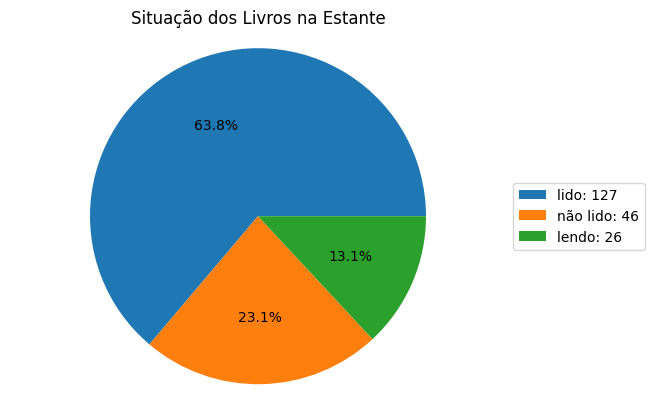

In [14]:
plt.pie(contagem, autopct='%1.1f%%')
plt.axis('equal')

legenda = ['{}: {}'.format(regiao, valor) for regiao, valor in zip(contagem.index, contagem.values)]
plt.legend(legenda, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Situação dos Livros na Estante')

### 5\.2 Visualização no Gráfico de Barras

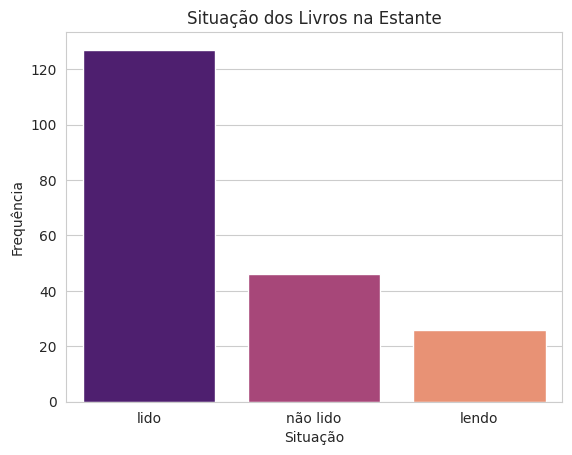

In [15]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=situacao_df, x="Situação", y="Frequência", errorbar=None, palette='magma')
  grafico.set(title='Situação dos Livros na Estante', xlabel='Situação', ylabel='Frequência');



---



## 6\. Insights

- A maior parte dos livros da estante já foram lidos.
- Há uma grande disparidade entre o número de livros lidos, em relação aos não lidos e os que se encontram em processo de leitura.
- Para aumentar a quantidade de livros lidos de forma mais eficiente, é mais vantajoso acabar de ler os livros que se encontram na categoria lendo, já que eles estão em menor quantidade.
- Ao invés de comprar livros novos, pode ser melhor terminar de ler todos os outros livros que não estão na categoria lido.

